In [1]:
import sys
sys.path.append(".gitignore/ST456-data/")

In [2]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import imdb
from keras import models
from keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow import keras

## Datasets for this assessment

https://www.dropbox.com/sh/sztempv7hymr3ck/AADjIBGNJgKl9Ox7LcpKlgR7a?dl=0

## P1 - permutation-invariant functions

Consider the problem of learning a permutation-invariant function <img src="https://render.githubusercontent.com/render/math?math=f:\mathbb{R}^m\rightarrow\mathbb{R}"> with $d=1$ by using a neural network according to the <img src="https://render.githubusercontent.com/render/math?math=(\phi,\rho)">-sum-decomposition neural network architecture defined in lectures.

For function <img src="https://render.githubusercontent.com/render/math?math=\phi">, use a feedforward neural network with one hidden layer with 100 neurons and ReLU activation function, and the output layer with `lat_dim` output units. `lat_dim` is a hyperparameter which you will need to set to values specified below.

For function <img src="https://render.githubusercontent.com/render/math?math=\rho">, use a feedforward neural network with one hidden layer with 100 neurons and ReLU activation function.

For training, use the stochastic gradient descent algorithm with learning rate 1e-4. Use MSE for the loss function. Use a validation dataset by taking 0.1 portion of the training dataset (validation split). Use batch size of value 128.





 

### P1.1

Implement the neural network specified above. Explain your implementation.



In [3]:
import pandas as pd
# remember to download the HWdata.csv and adjust the path
train_data = pd.read_csv('.gitignore/ST456-data/train-1.csv', header= None)
test_data = pd.read_csv('.gitignore/ST456-data/test-1.csv', header= None)

y_train = train_data.pop(10)
x_train = train_data
y_test = test_data.pop(10)
x_test = test_data

In [39]:
x_train.shape

(100000, 10)

In [110]:
x_train.head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.443132,0.532405,0.437770,0.061966,0.783677,0.935789,0.909104,0.683616,0.895410,0.871122
1,0.270151,0.563418,0.136042,0.164526,0.013159,0.731077,0.961079,0.202600,0.921334,0.731678
2,0.571161,0.124119,0.826382,0.692914,0.817431,0.573339,0.248638,0.632073,0.606688,0.348984
3,0.414595,0.541134,0.383968,0.696607,0.113355,0.591044,0.770690,0.016159,0.291561,0.666265
4,0.069221,0.047482,0.269938,0.812681,0.533125,0.091919,0.581794,0.854649,0.298028,0.819031
5,0.685363,0.227652,0.694577,0.806527,0.368828,0.295510,0.633057,0.680897,0.293867,0.463691
6,0.760441,0.812699,0.829540,0.687209,0.847066,0.671689,0.354833,0.822099,0.463387,0.304425
7,0.130865,0.135353,0.288127,0.873986,0.468564,0.004831,0.342312,0.034109,0.703829,0.998254
8,0.631045,0.865065,0.994880,0.597455,0.746800,0.363470,0.410864,0.459091,0.846596,0.939222
9,0.763400,0.492039,0.561561,0.285750,0.152667,0.359379,0.943843,0.359380,0.505564,0.443119


In [111]:
y_train.head(10)

0    0.733646
1    0.416784
2    0.590013
3    0.477864
4    0.415577
5    0.548374
6    0.723825
7    0.315219
8    0.688923
9    0.467579
Name: 10, dtype: float64

In [92]:
class Phi(tf.keras.Model):
    
    def __init__(self, lat_dim):
        super().__init__()
        self.layer1 = layers.Dense(100,activation='relu',name='phi-hidden')
        self.layer2 = layers.Dense(lat_dim,name='phi-output')
    
    def call(self, inputs):
        x1 = self.layer1(inputs)
        x2 = self.layer2(x1)
        
        return tf.math.reduce_sum(
    x2,1, keepdims=True)
                                   
class Rho(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        self.layer1 = layers.Dense(100,activation='relu',name='Rho-hidden-layer',input_shape=(1,))
        self.layer2 = layers.Dense(1,name='rho-output')
    
    def call(self, inputs):
        x1 = self.layer1(inputs)
        x2 = self.layer2(x1)
        
        return x2
                                   
class Function(tf.keras.Model):
    
    def __init__(self, lat_dim):
        super().__init__()
        self.layer1 = Phi(lat_dim)
        self.layer2 = Rho()
    
    def call(self, inputs):
        x1 = self.layer1(inputs)
        x2 = self.layer2(x1)
        
        return x2
    
    

In [93]:
function = Function(5)



In [99]:
def permutation_invariant(lat_dim,learning_rate):
    function.build(input_shape=(1,10))
    function.summary()

    function.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate), loss='MSE')
    history = function.fit(x_train, y_train, epochs=10, batch_size=128,validation_split=.1, verbose=2)
    # MSE Test 
    print("Test")
    loss = function.evaluate(x_test, y_test,verbose=1)
    print(f"Mean Square Error Test Data: {loss}")
    return history, function

### P1.2

Train the neural network with `lat_dim = 5` for 10 epochs. Show the test and validation loss versus the number of epochs. Show also the test MSE value. Repeat this but by taking `lat_dim = 100`. Discuss the obtained results. 

In [100]:
h, function= permutation_invariant(5,1e-4)

Model: "function_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 phi_22 (Phi)                multiple                  1605      
                                                                 
 rho_12 (Rho)                multiple                  301       
                                                                 
Total params: 1,906
Trainable params: 1,906
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
704/704 - 1s - loss: 0.0125 - val_loss: 0.0125 - 794ms/epoch - 1ms/step
Epoch 2/10
704/704 - 0s - loss: 0.0125 - val_loss: 0.0124 - 430ms/epoch - 610us/step
Epoch 3/10
704/704 - 0s - loss: 0.0124 - val_loss: 0.0124 - 409ms/epoch - 581us/step
Epoch 4/10
704/704 - 0s - loss: 0.0123 - val_loss: 0.0123 - 409ms/epoch - 581us/step
Epoch 5/10
704/704 - 0s - loss: 0.0123 - val_loss: 0.0122 - 473ms/epoch - 672us/step
Epoch 6/10
704/704 - 0s - 

In [101]:

h, function= permutation_invariant(100,1e-4)

Model: "function_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 phi_22 (Phi)                multiple                  1605      
                                                                 
 rho_12 (Rho)                multiple                  301       
                                                                 
Total params: 1,906
Trainable params: 1,906
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
704/704 - 1s - loss: 0.0119 - val_loss: 0.0118 - 692ms/epoch - 983us/step
Epoch 2/10
704/704 - 0s - loss: 0.0118 - val_loss: 0.0118 - 394ms/epoch - 560us/step
Epoch 3/10
704/704 - 1s - loss: 0.0117 - val_loss: 0.0117 - 527ms/epoch - 748us/step
Epoch 4/10
704/704 - 0s - loss: 0.0117 - val_loss: 0.0116 - 438ms/epoch - 622us/step
Epoch 5/10
704/704 - 0s - loss: 0.0116 - val_loss: 0.0116 - 391ms/epoch - 556us/step
Epoch 6/10
704/704 - 0s 

### Discussion

In general the neural network with input(100, 1e-4) converges faster to a lower loss in test and validation data. This is consistent with the empirical claim seen in lectures that adding more neurons (or size in the neural network) will make a model perform better. 

The decisive superiority of the (100,1e-4) is seen in the  evaluation using the Test MSE. Which is approximatley 73% of the first model.

### P1.3

Train the neural network with `lat_dim = 100` for 10 epochs, for different values of learning rates equal to 0.01, 0.1, and 0.5. Discuss the obtained results.

In [781]:
data_loss = dict()
data_valid_loss = dict()
for learning_rate in [.01,.1,.5]:
    print("\n \n")
    print(f"Results with Learning_rate:{learning_rate} iteration \n")
    hist = set_f(100,learning_rate)
    data_loss[learning_rate] = hist.history["loss"] 
    data_valid_loss[learning_rate] = hist.history["val_loss"] 

df_loss = pd.DataFrame(data_loss)
df_valid_loss = pd.DataFrame(data_valid_loss)


 

Results with Learning_rate:0.01 iteration 

Model: "set-function"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 phi-hidden (Dense)          (None, 100)               1100      
                                                                 
 phi-output (Dense)          (None, 100)               10100     
                                                                 
 Z (Dense)                   (None, 1)                 101       
                                                                 
 Rho-hidden-layer (Dense)    (None, 100)               200       
                                                                 
 rho-output (Dense)          (None, 1)                 101       
                                                                 
Total params: 11,602
Trainable params: 11,602
Non-trainable params: 0
_________________________________________________________________
Ep

### Training Loss

<AxesSubplot:>

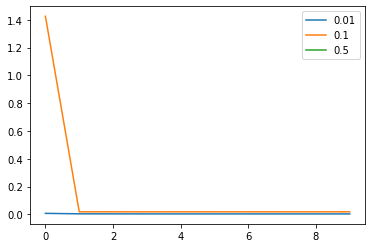

In [782]:
df_loss.plot()

### Validation Loss

<AxesSubplot:>

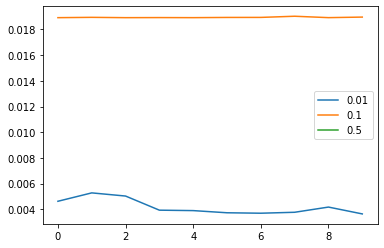

In [783]:
df_valid_loss.plot()

### Results

An important result from this exercise is the nonconvergence when a rate of .5 is used. This result is consistent with the topic we saw in lectures that explain that a "big" step in the learning rate makes the model lose the minimum value.

Another important and interesting result is the fact that a learning rate of .01 has better results in train, valid and test in terms of the loss function, despite the higher volatility in some epochs. An intuition on why this result happen is that the learning rate steps for .1 are so big that becomes diverge for the minimum value. 



### P1.4

Train the neural network with `lat_dim = 100` for 50 epochs, with ReLU activation functions. Show the training and validation loss versus the number of epochs. Repeat this for the same setting but with ReLU activation functions replaced with sigmoid activation functions. Discuss the results.

In [792]:
from tensorflow import keras

def set_fQ4(lat_dim,learning_rate, activation, epochs):
    # Function that define sthe whole phi rho descomposition neural network.
    # Parameters is the desired lat_dim and learning rate for stoachastic gradient descent.
    
    function = keras.Sequential(name='set-function')  
    # First Hidden layer from Phi function. The activation is relu.
    function.add(layers.Dense(100,activation=activation,name='phi-hidden',input_shape=(10,)))
    function.add(layers.Dense(lat_dim,name='phi-output'))
    function.add(layers.Dense(1,name='Z', kernel_initializer=tf.keras.initializers.Ones())) 
    # Rho function starts with the input of the phi function and enters the hidden layers
    function.add(layers.Dense(100,activation=activation,name='Rho-hidden-layer'))
    
    ## The final output is of one dimension
    function.add(layers.Dense(1,name='rho-output'))
    
    # Observe compile the model
    function.summary()
    function.weights
    function.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate), loss='MSE')
    history = function.fit(x_train, y_train, epochs= epochs, batch_size=128,validation_split=.1, verbose=0)
    
    # MSE Test 
    print("Test")
    loss = function.evaluate(x_test, y_test,verbose=1)
    print(f"Mean Square Error Test Data: {loss}")
    return history

In [793]:
data_loss = dict()
data_valid_loss = dict()
for activation in ["relu", "sigmoid"]:
    print("\n \n")
    print(f"Results with Activation:{activation} \n")
    hist = set_fQ4(100,1e-4, activation, 50)
    data_loss[activation] = hist.history["loss"] 
    data_valid_loss[activation] = hist.history["val_loss"] 

df_loss = pd.DataFrame(data_loss)
df_valid_loss = pd.DataFrame(data_valid_loss)


 

Results with Activation:relu 

Model: "set-function"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 phi-hidden (Dense)          (None, 100)               1100      
                                                                 
 phi-output (Dense)          (None, 100)               10100     
                                                                 
 Z (Dense)                   (None, 1)                 101       
                                                                 
 Rho-hidden-layer (Dense)    (None, 100)               200       
                                                                 
 rho-output (Dense)          (None, 1)                 101       
                                                                 
Total params: 11,602
Trainable params: 11,602
Non-trainable params: 0
_________________________________________________________________
Test
313/313 [=

### Training Loss Plot

<AxesSubplot:>

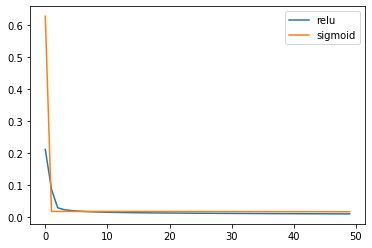

In [794]:
df_loss.plot()

### Validation Loss Plot

<AxesSubplot:>

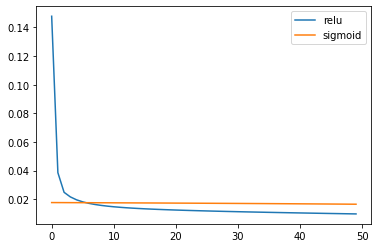

In [795]:
df_valid_loss.plot()

### Results

As claimed in the lecture, ReLu performs much better than the Sigmoid activation function for train, validation and test data. 

In this case, the reason might be that the ReLu Activation function it allows the output numbers to have bigger values than 1, and helps the model to accomplish the differentiation between different domains. 

### P1.5

In this part you need to evaluate the neural network architecture defined above, for different values of `lat_dim` in [1, 2, ..., 10, 20, 30, ..., 100]. For each setting of `lat_dim`, run 5 independent training runs, each for 5 epochs. For each training run, select the best model found with respect to the MSE validation metric. Compute the test MSE value of the best model for each training run. For each `lat_dim`, compute the mean of the test MSE values of the best models identified in the corresponding training runs. Show the mean test MSE versus `lat_dim` in a plot. Comment the results. 

In [796]:
from tensorflow import keras

def set_f5(lat_dim,learning_rate):
    # Function that define sthe whole phi rho descomposition neural network.
    # Parameters is the desired lat_dim and learning rate for stoachastic gradient descent.
    
    function = keras.Sequential(name='set-function')  
    # First Hidden layer from Phi function. The activation is relu.
    function.add(layers.Dense(100,activation='relu',name='phi-hidden',input_shape=(10,)))
    function.add(layers.Dense(lat_dim,name='phi-output'))
    function.add(layers.Dense(1,name='Z', kernel_initializer=tf.keras.initializers.Ones()))    
    # Rho function starts with the input of the phi function and enters the hidden layers
    function.add(layers.Dense(100,activation='relu',name='Rho-hidden-layer'))
    
    ## The final output is of one dimension
    function.add(layers.Dense(1,name='rho-output'))
    
    # Observe compile the model

    function.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate), loss='MSE')
    history = function.fit(x_train, y_train, epochs=5, batch_size=128,validation_split=.1, verbose=0)
    
    mse_valid = history.history["val_loss"][4]
    
    return function, mse_valid

In [797]:
data_MSE = dict()



for lat_dim in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]:
    best = 100
    for _ in range(1,6):


        function, mse_valid = set_f5(lat_dim,1e-4)
        
        if mse_valid <=best:
            best_function = function
            best = mse_valid

    data_MSE[lat_dim]= float(tf.math.reduce_mean( tf.metrics.mean_squared_error( y_test , best_function.predict(x_test) )))

<AxesSubplot:>

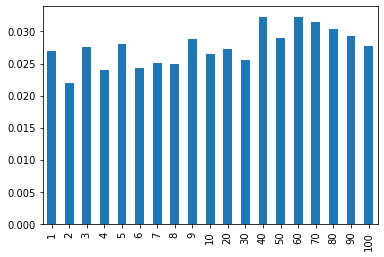

In [798]:
pd.Series(data_MSE).plot(kind="bar")

The results show that the mean estimator of the parameter mean test MSE (which is non biased) is best in the model with lat_dim=3. So the parameter we chose is not the best for lat_dim=100 or 5.

# P2 - permutation-equivariant functions

Consider the problem of learning a permutation-equivariant function <img src="https://render.githubusercontent.com/render/math?math=f:\mathbb{R}^{m\times{d}}\rightarrow\{0,1\}^m"> by using a feedforward neural network with equivariant layers - see lectures for definition. The function we are going to consider corresponds to a choice function that for each set of input items outputs the choice of one of these items (using one-hot encoding).

We consider a feedforward neural network with `L` equivariant layers. Each of the first `L-1` layers consists of an equivariant affine transformation followed by ReLU activation units with output dimension <img src="https://render.githubusercontent.com/render/math?math=m\times{w}">. The output layer is an equivariant affine transformation with output dimension <img src="https://render.githubusercontent.com/render/math?math=m">.   

For training, use Adam optimizer with learning rate of value 1e-4 and epsilon set to value 1e-3. For the loss function, use MSE. Use validation split of value 0.1. Use batch size of value 300. Use the number of epochs of value 100.

The training dataset is given in `xtrain-2.csv` and `ytrain-2.csv`. Each row of xtrain-2.csv contains values of a flatten <img src="https://render.githubusercontent.com/render/math?math=m\times{d}"> matrix (row concatenation). Each row of ytrain-2.csv contains elements of a <img src="https://render.githubusercontent.com/render/math?math=m"> dimensional output vector. The test dataset is given in `xtest-2.csv` and `ytest-2.csv` and is of the same format. In these datasets, <img src="https://render.githubusercontent.com/render/math?math=m=5"> and <img src="https://render.githubusercontent.com/render/math?math=d=3">.

You need to perform the following tasks:

In [601]:
x_train2 = pd.read_csv('ST456-data/xtrain-2.csv', index_col = "Unnamed: 0")
y_train2 = pd.read_csv('ST456-data/ytrain-2.csv', index_col = "Unnamed: 0")
y_test2 = pd.read_csv('ST456-data/ytest-2.csv', index_col = "Unnamed: 0")
x_test2 = pd.read_csv('ST456-data/xtest-2.csv', index_col = "Unnamed: 0")

### P2.1

Implement the feedforward neural network defined above. Explain your implementation.

# Answer
When I worked the equivariant affine transformation, I obtained that it helps preserve the same parameters per cell, changing only the variables. 
For example, if tensor is $(x_1,x_2)$ and we go from 2x1 to 2x1 (m,d)

$y1 = ax_1+bx_2 +c\\$
$y2 = bx_1+ax_2+c$
To translate this to code, I generate a Convolutional1D Neural Network, where each cell uses all the variables of the tensor, but maintaining the same parameters.



To achieve the latter, I allow the kernel to be 15x1, but the stride is 3 (w for the inner layers) and I do it 5 times. This generates the desired same parameters but with different variables as input. A problem that I have is that I need to Reflect the tensor with Padding to let it repeat variables, I wasn't able to do it but I found it is possible. 


In [608]:
from tensorflow.keras import Model

def perm_equivariant(L, w):
    
    # First Layer. Because I want the function to be an equivariant transformation
    # I define a Convolutional layer in 1D that has the same parameters in each equation that gives an element of the output.

    model2 = tf.keras.Sequential()
    
    # The ideal padding is to reflect the data, but it wasn't possible with conv1D.
    model2.add(tf.keras.layers.Conv1D(w, 15,strides=3,padding="same", activation="relu",input_shape = (15, 1)))
    
    #Create the next L-1 layers. respecting output mxd
    for _ in range(0,L-2):
        # Reshape to a vector again for quicker computation
        model2.add(tf.keras.layers.Reshape((5*w,1)))
        model2.add(tf.keras.layers.Conv1D(w, 5*w,strides=w,padding="same", activation="relu"))

    #Final layer
    model2.add(tf.keras.layers.Reshape((5*w,1)))
    model2.add(tf.keras.layers.Conv1D(1, 5*w,strides=w,padding="same",activation="relu"))
    
    print(model2.summary())
    
    model2.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-4, epsilon=1e-3), loss='MSE')
    history = model2.fit(x_train2, y_train2, epochs=100, batch_size=300,validation_split=.1, verbose=0)
 
    print("Test")
    loss = model2.evaluate(x_test2, y_test2,verbose=1)
    print(f"Mean Square Error Test Data: {loss}")
    
    return history, model2

### P2.2

Train the neural network with <img src="https://render.githubusercontent.com/render/math?math=(L,w)=(2,5)">. Show the training and validation loss versus the number of epochs. Compute the test MSE value. Repeat this for <img src="https://render.githubusercontent.com/render/math?math=(L,w)"> set to (2,10), (2,100), (2,200), (3,5), (3,10), (3,100), and (3,200). Discuss the obtained results. 

### Test MSE Value per Input

In [609]:
hex1,mod1 = perm_equivariant(2, 5)

Model: "sequential_209"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_138 (Conv1D)         (None, 5, 5)              80        
                                                                 
 reshape_91 (Reshape)        (None, 25, 1)             0         
                                                                 
 conv1d_139 (Conv1D)         (None, 5, 1)              26        
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
None
Test
6250/6250 [==============================] - 4s 686us/step - loss: 0.1600
Mean Square Error Test Data: 0.16001220047473907


In [610]:
hex2,mod2 = perm_equivariant(2, 100)

Model: "sequential_210"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_140 (Conv1D)         (None, 5, 100)            1600      
                                                                 
 reshape_92 (Reshape)        (None, 500, 1)            0         
                                                                 
 conv1d_141 (Conv1D)         (None, 5, 1)              501       
                                                                 
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________
None
Test
6250/6250 [==============================] - 5s 757us/step - loss: 0.1512
Mean Square Error Test Data: 0.15123909711837769


In [611]:
hex3,mod3 = perm_equivariant(2, 200)

Model: "sequential_211"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_142 (Conv1D)         (None, 5, 200)            3200      
                                                                 
 reshape_93 (Reshape)        (None, 1000, 1)           0         
                                                                 
 conv1d_143 (Conv1D)         (None, 5, 1)              1001      
                                                                 
Total params: 4,201
Trainable params: 4,201
Non-trainable params: 0
_________________________________________________________________
None
Test
6250/6250 [==============================] - 5s 849us/step - loss: 0.1495
Mean Square Error Test Data: 0.14950929582118988


In [612]:
hex4,mod4 = perm_equivariant(3, 5)

Model: "sequential_212"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_144 (Conv1D)         (None, 5, 5)              80        
                                                                 
 reshape_94 (Reshape)        (None, 25, 1)             0         
                                                                 
 conv1d_145 (Conv1D)         (None, 5, 5)              130       
                                                                 
 reshape_95 (Reshape)        (None, 25, 1)             0         
                                                                 
 conv1d_146 (Conv1D)         (None, 5, 1)              26        
                                                                 
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________
None
Test
6250/6250 [==============================] -

In [613]:
hex5,mod5 = perm_equivariant(3, 10)

Model: "sequential_213"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_147 (Conv1D)         (None, 5, 10)             160       
                                                                 
 reshape_96 (Reshape)        (None, 50, 1)             0         
                                                                 
 conv1d_148 (Conv1D)         (None, 5, 10)             510       
                                                                 
 reshape_97 (Reshape)        (None, 50, 1)             0         
                                                                 
 conv1d_149 (Conv1D)         (None, 5, 1)              51        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
None
Test
6250/6250 [==============================] -

In [614]:
hex6.mod6 = perm_equivariant(3, 100)

Model: "sequential_214"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_150 (Conv1D)         (None, 5, 100)            1600      
                                                                 
 reshape_98 (Reshape)        (None, 500, 1)            0         
                                                                 
 conv1d_151 (Conv1D)         (None, 5, 100)            50100     
                                                                 
 reshape_99 (Reshape)        (None, 500, 1)            0         
                                                                 
 conv1d_152 (Conv1D)         (None, 5, 1)              501       
                                                                 
Total params: 52,201
Trainable params: 52,201
Non-trainable params: 0
_________________________________________________________________
None
Test
6250/6250 [===========================

In [615]:
hex7, mod7 = perm_equivariant(3, 200)

Model: "sequential_215"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_153 (Conv1D)         (None, 5, 200)            3200      
                                                                 
 reshape_100 (Reshape)       (None, 1000, 1)           0         
                                                                 
 conv1d_154 (Conv1D)         (None, 5, 200)            200200    
                                                                 
 reshape_101 (Reshape)       (None, 1000, 1)           0         
                                                                 
 conv1d_155 (Conv1D)         (None, 5, 1)              1001      
                                                                 
Total params: 204,401
Trainable params: 204,401
Non-trainable params: 0
_________________________________________________________________
None
Test
6250/6250 [=========================

In [616]:
hex8,mod8 = perm_equivariant(2, 10)

Model: "sequential_216"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_156 (Conv1D)         (None, 5, 10)             160       
                                                                 
 reshape_102 (Reshape)       (None, 50, 1)             0         
                                                                 
 conv1d_157 (Conv1D)         (None, 5, 1)              51        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________
None
Test
6250/6250 [==============================] - 5s 759us/step - loss: 0.1556
Mean Square Error Test Data: 0.1555977314710617


In [575]:
lista,mod9 = list()

### Loss Vs Epochs graphs

In [582]:
for hist in [hex1,hex2,hex3,hex4,hex5,hex6,hex7,hex8]:
    lista.append(hist.history['loss'])


In [589]:
pd.DataFrame(lista).T.to_csv("results.csv")

In [592]:
df = pd.DataFrame(lista).T

In [594]:
df.columns = ["loss (2, 5)", "loss (2, 100)",
             "loss (2, 200)", "loss (3, 5)",
            "loss (3, 10)", "loss (3, 100)",
            "loss (3, 200)", "loss (2, 10)"]

<AxesSubplot:>

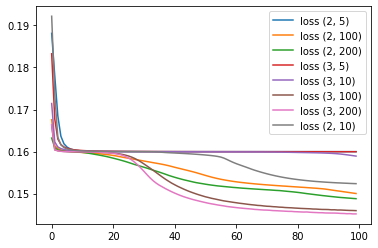

In [595]:
df.plot()

In [596]:
lista = list()
for hist in [hex1,hex2,hex3,hex4,hex5,hex6,hex7,hex8]:
    lista.append(hist.history['val_loss'])



In [597]:
pd.DataFrame(lista).T.to_csv("results_val_loss.csv")

In [599]:
df = pd.DataFrame(lista).T
df.columns = ["val_loss (2, 5)", "val_loss (2, 100)",
             "val_loss (2, 200)", "val_loss (3, 5)",
            "val_loss (3, 10)", "val_loss (3, 100)",
            "val_loss (3, 200)", "val_loss (2, 10)"]

<AxesSubplot:>

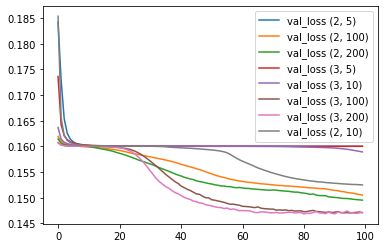

In [600]:
df.plot()

It turns out the models become better as the Size of the layer increases. Nevertheless, it looks like after size 100 depth of the layer makes the model perform better than adding more size.